In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import missingno as mnso
import warnings
warnings.filterwarnings('ignore')



Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat     

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,43431.000000,7550.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.137252,2.030066,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,0.437712,1.461756,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,2.000000,1.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,3.000000,7.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000



Missing values before initial drop:
id                         0
user_id                    0
vehicle_model_id           0
travel_type_id             0
package_id             35881
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

Missing values after initial drop:
id                         0
user_id                    0
vehicle_model_id           0
travel_type_id             0
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
Car_Cancellation           0
dtype: int64

M

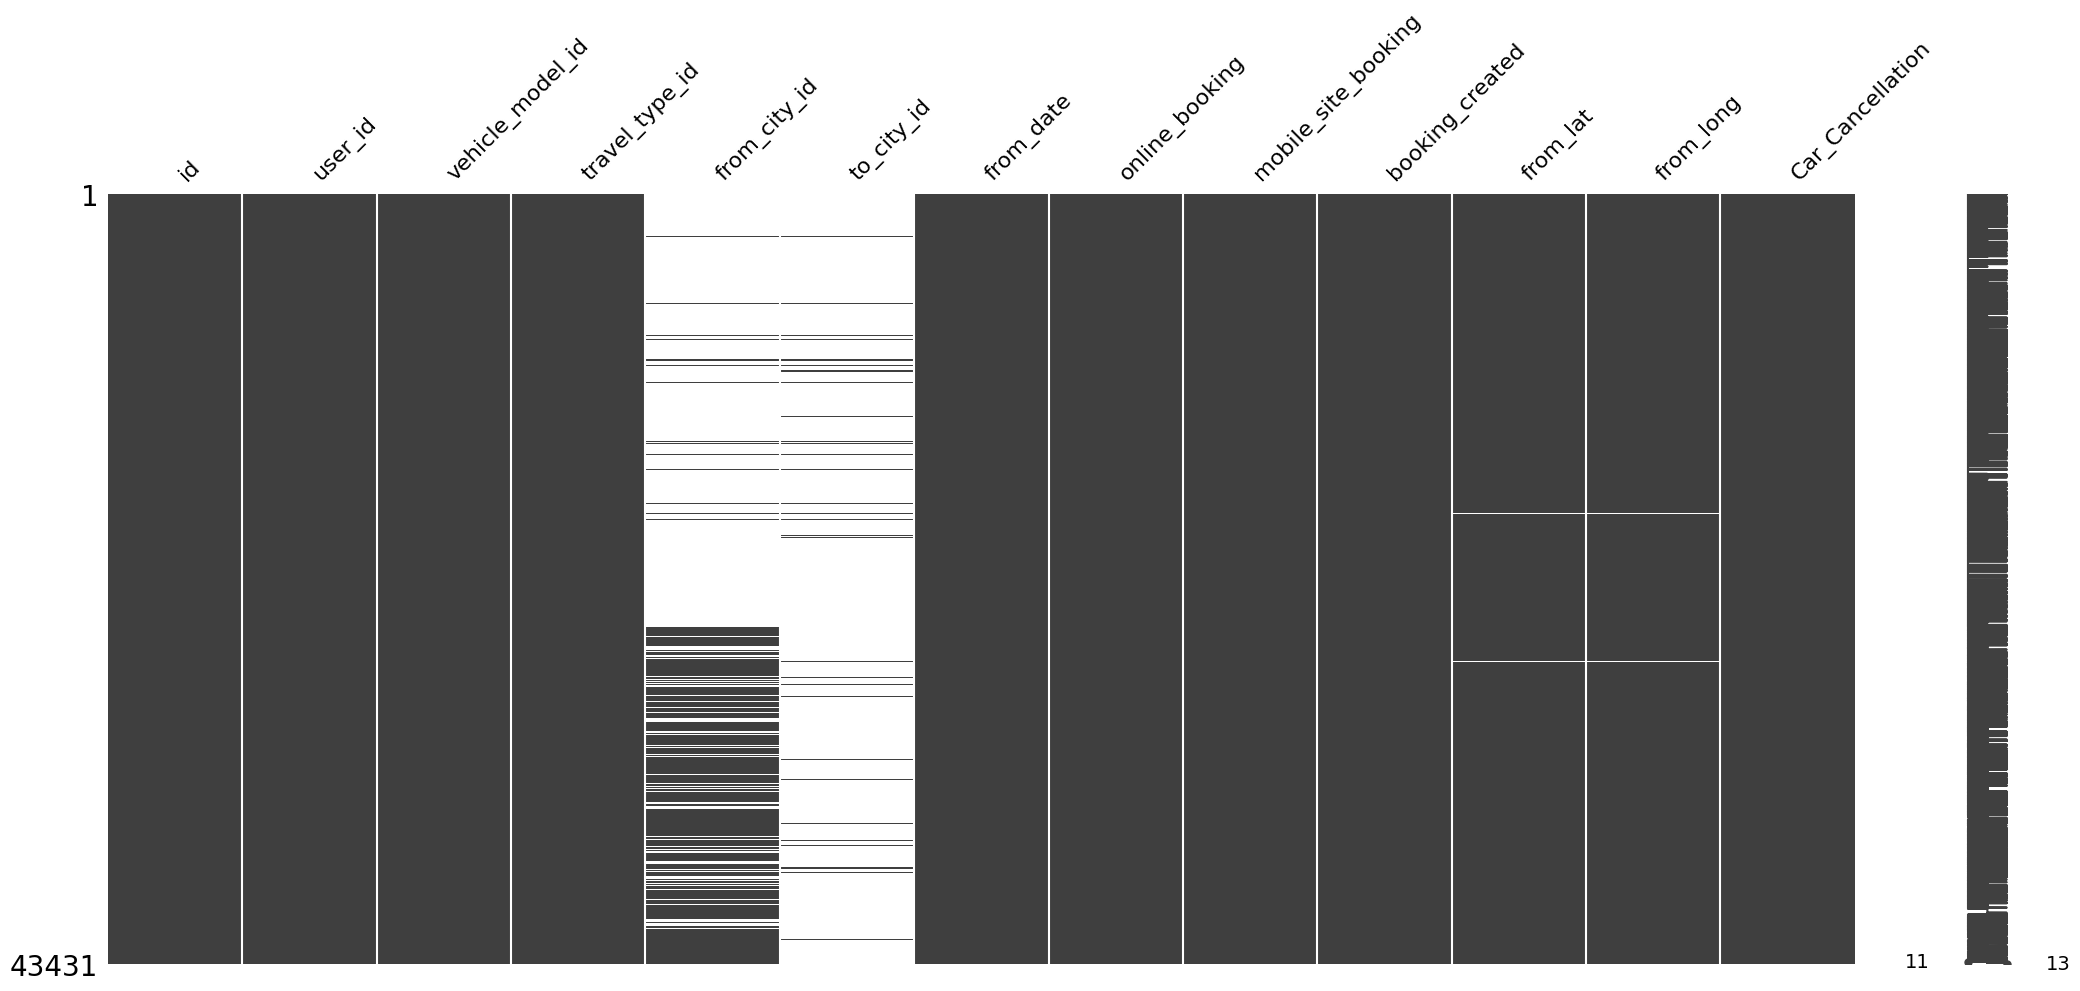


Unique Value Counts:
id                     43431
user_id                22267
vehicle_model_id          27
travel_type_id             3
from_city_id               3
to_city_id               116
from_date              20377
online_booking             2
mobile_site_booking        2
booking_created        39349
from_lat                 466
from_long                462
Car_Cancellation           2
dtype: int64


In [33]:
# --- Data Loading ---
# Task 1: Recurring issue of booking cancellations due to unavailability of cars.
# Task 2: Particularly during peak hours or in less accessible areas.
# Task 3: Cancellations often occur close to the scheduled trip time, leaving customers with little time to make alternative arrangements, thereby causing significant frustration.

df = pd.read_csv("C:/Users/Khushraj Singh/Downloads/YourCabs.csv")
print("Original DataFrame Info:")
df.info()
print("\nOriginal DataFrame Description:")
display(df.describe())
print("\nMissing values before initial drop:")
print(df.isnull().sum())

# --- Initial Data Cleaning and Exploration ---
# Drop columns as per initial analysis
cols_to_drop_initial = ['to_lat','to_long','package_id','from_area_id','to_area_id']
df.drop(columns=[col for col in cols_to_drop_initial if col in df.columns], axis=1, inplace=True)

print("\nMissing values after initial drop:")
print(df.isnull().sum())
print("\nMissing value matrix after initial drop:")
mnso.matrix(df)
plt.show() # Show the missing value matrix plot

print("\nUnique Value Counts:")
print(df.nunique())




📊 Skewness of Numeric Columns:

id: -0.00


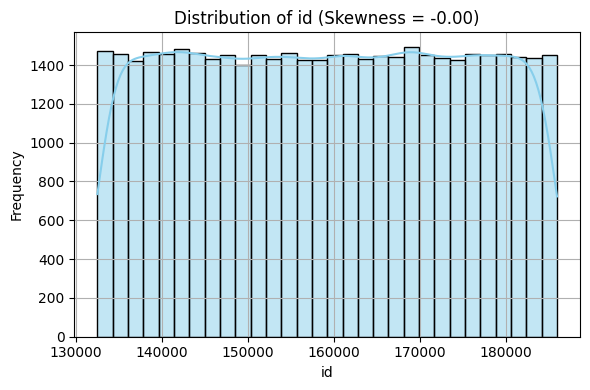

user_id: -0.75


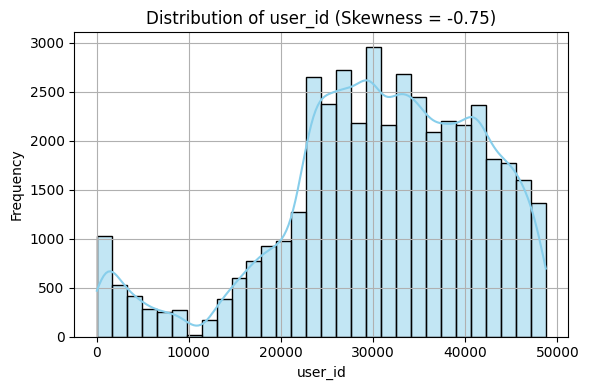

vehicle_model_id: 1.67


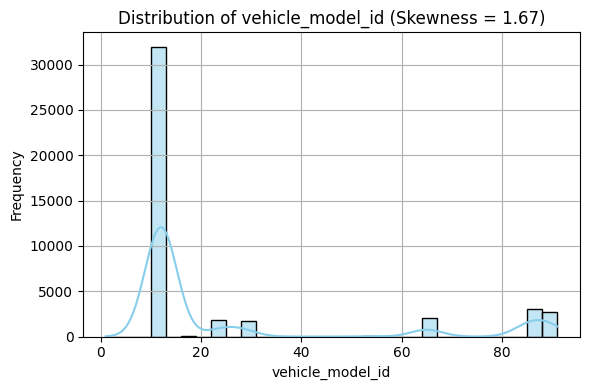

travel_type_id: 0.67


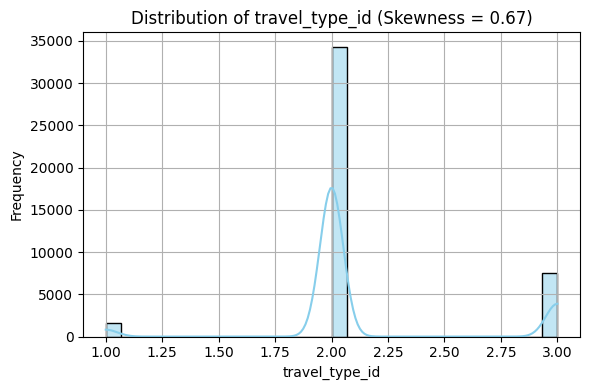

from_city_id: -10.08


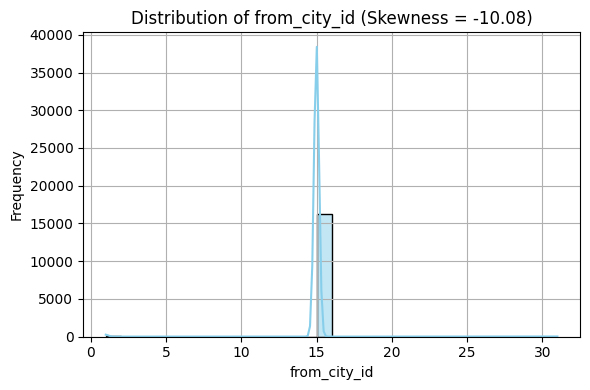

to_city_id: 1.03


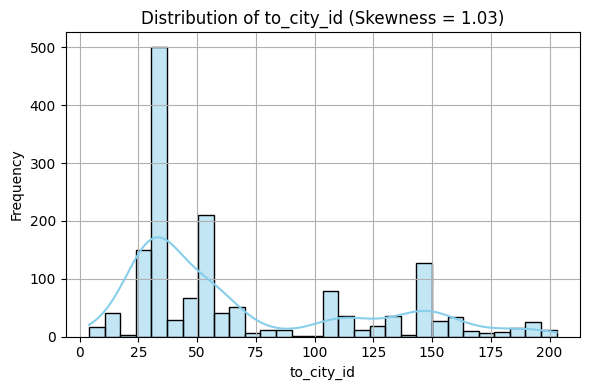

online_booking: 0.62


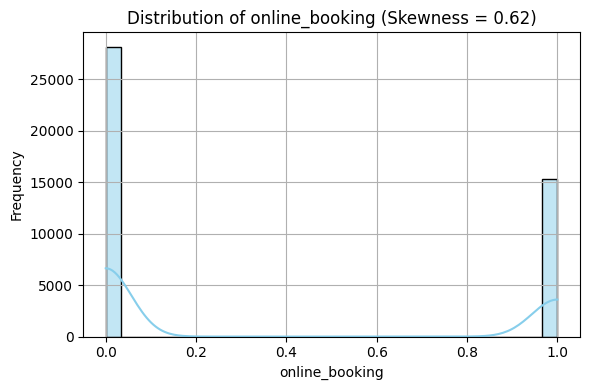

mobile_site_booking: 4.49


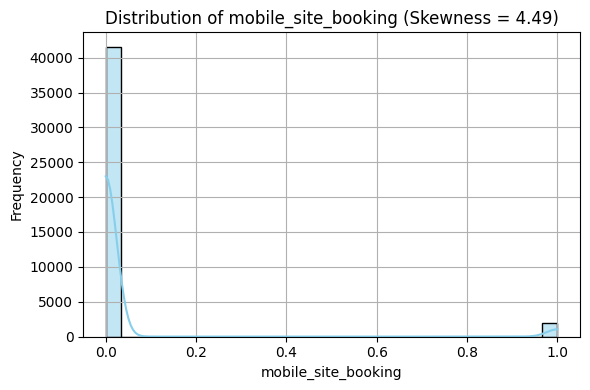

from_lat: 1.21


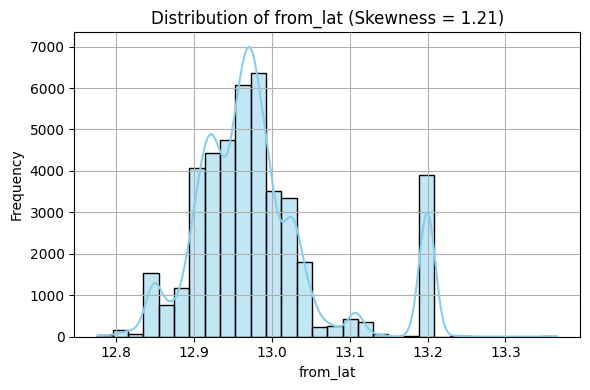

from_long: -0.15


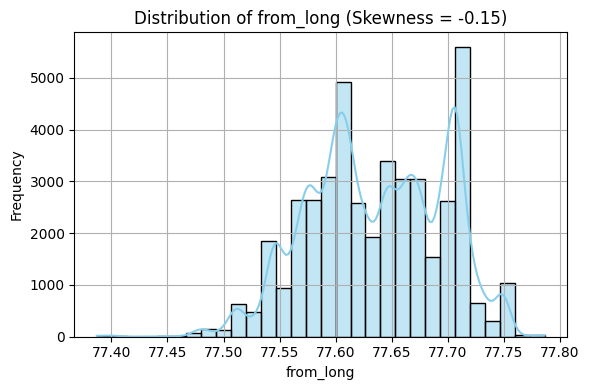

Car_Cancellation: 3.31


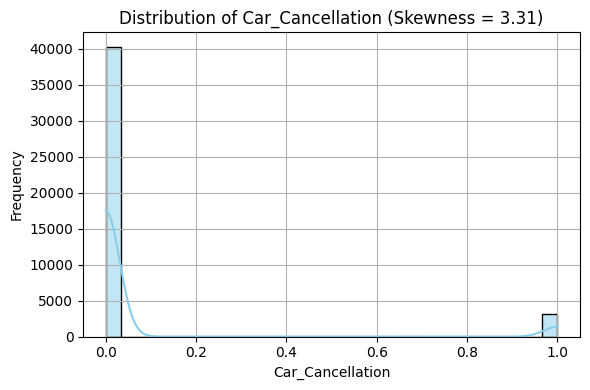

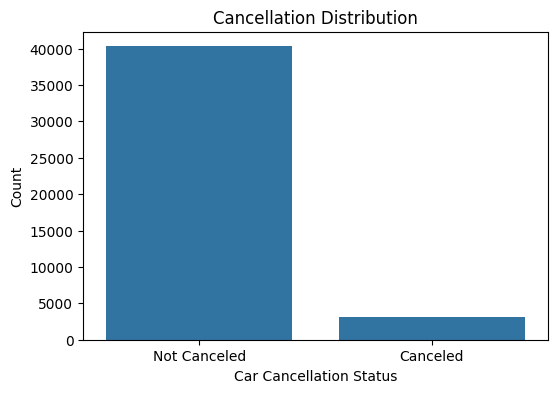

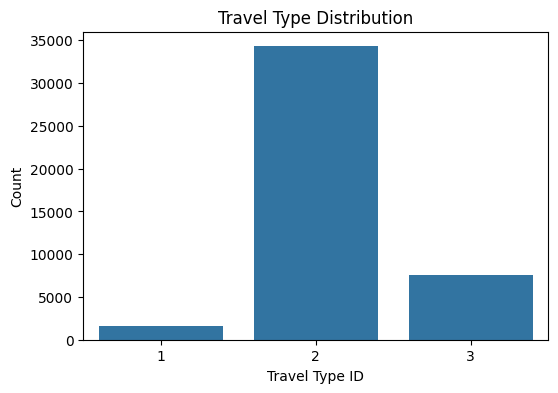

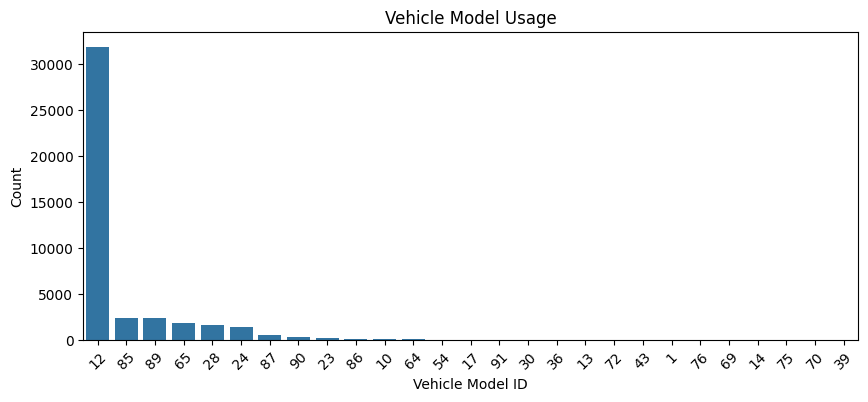

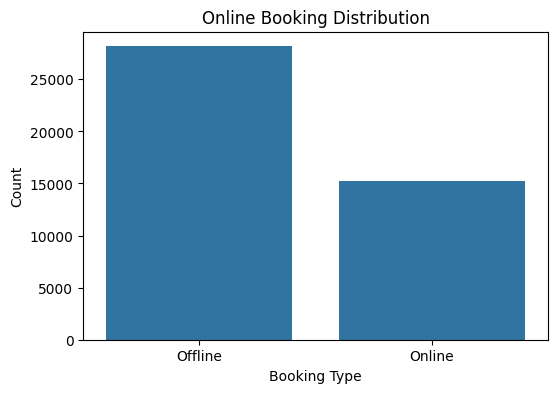

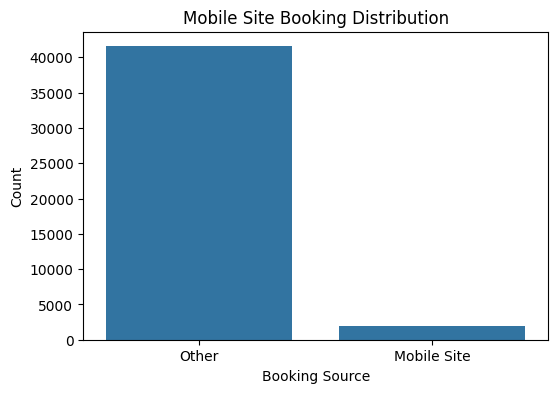

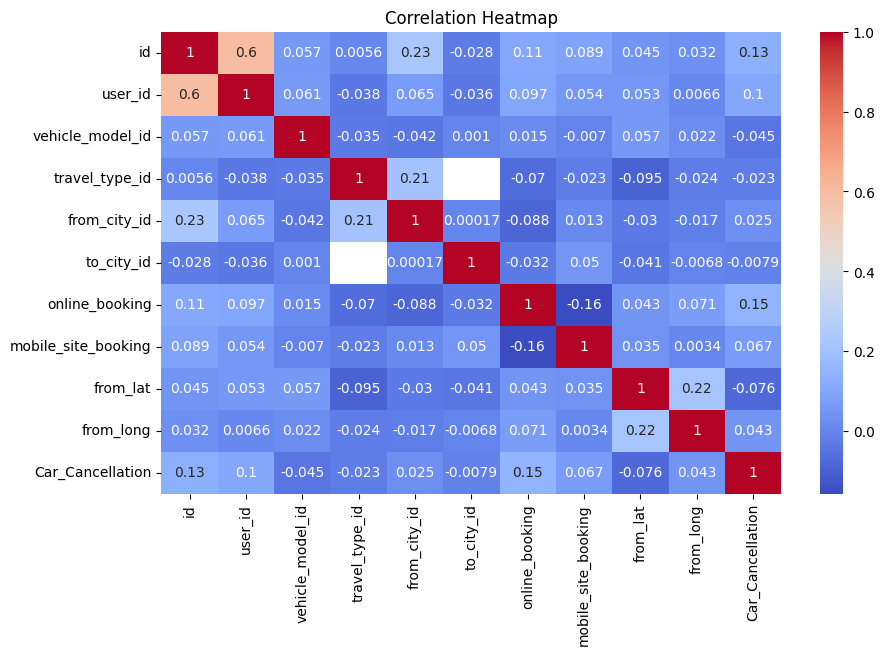

In [34]:
# Select only numeric columns for skewness and distribution plots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Check skewness for each numeric column and plot histograms
print("\n📊 Skewness of Numeric Columns:\n")
for col in numeric_cols:
    skew_val = df[col].skew()
    print(f"{col}: {skew_val:.2f}")

    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col} (Skewness = {skew_val:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Exploratory Data Analysis (EDA) Visualizations ---

# Distribution of Car Cancellation
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Car_Cancellation')
plt.title('Cancellation Distribution')
plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.xlabel('Car Cancellation Status')
plt.ylabel('Count')
plt.show()

# Travel Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='travel_type_id')
plt.title('Travel Type Distribution')
plt.xlabel('Travel Type ID')
plt.ylabel('Count')
plt.show()

# Vehicle Model Usage
if 'vehicle_model_id' in df.columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x='vehicle_model_id', order=df['vehicle_model_id'].value_counts().index)
    plt.title('Vehicle Model Usage')
    plt.xlabel('Vehicle Model ID')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Online vs Offline Booking
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='online_booking')
plt.title('Online Booking Distribution')
plt.xticks([0,1], ['Offline', 'Online'])
plt.xlabel('Booking Type')
plt.ylabel('Count')
plt.show()

# Mobile site booking vs other
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='mobile_site_booking')
plt.title('Mobile Site Booking Distribution')
plt.xticks([0,1], ['Other', 'Mobile Site'])
plt.xlabel('Booking Source')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [35]:
# --- ADVANCED PREPROCESSING & FEATURE ENGINEERING ---

# Drop columns as per business logic (ensuring they exist)
cols_to_drop_advanced = ['id', 'user_id', 'from_lat', 'from_long', 'to_lat', 'to_long', 'booking_created']
df = df.drop(columns=[col for col in cols_to_drop_advanced if col in df.columns])

# Vehicle model: is_VMID_12
if 'vehicle_model_id' in df.columns:
    df['is_VMID_12'] = (df['vehicle_model_id'] == 12).astype(int)
    df = df.drop(columns=['vehicle_model_id'])

# Impute from_city_id and to_city_id with mode
for col in ['from_city_id', 'to_city_id']:
    if col in df.columns:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

# --- TIME FEATURES ---
# Ensure 'from_date' exists before converting to datetime
if 'from_date' in df.columns:
    # Correcting the date format based on the error message
    df['from_date'] = pd.to_datetime(df['from_date'], format='%m/%d/%Y %H:%M', errors='coerce')

    # Day of week, month, weekday/weekend, hour, time of day
    df['day_of_week'] = df['from_date'].dt.dayofweek
    df['month'] = df['from_date'].dt.month
    df['hour'] = df['from_date'].dt.hour
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    def time_of_day(hour):
        if 5 <= hour < 12: return 'Morning'
        elif 12 <= hour < 17: return 'Afternoon'
        elif 17 <= hour < 21: return 'Evening'
        else: return 'Night'
    df['time_of_day'] = df['hour'].apply(time_of_day)

    # Calculate time_diff (hours between booking and trip start)
    # Check if 'booking_created' exists before calculating time_diff
    if 'booking_created' in df.columns:
        df['booking_created'] = pd.to_datetime(df['booking_created'])
        df['time_diff'] = (df['from_date'] - df['booking_created']).dt.total_seconds() / 3600
        def booking_nature(td):
            if td <= 2: return 'Urgent'
            elif td <= 6: return 'SameDay'
            elif td <= 24: return 'Regular'
            else: return 'Advance'
        df['booking_nature'] = df['time_diff'].apply(booking_nature)
    else:
        print("Warning: 'booking_created' column not found. Skipping time_diff and booking_nature feature engineering.")

    # Drop from_date (already extracted features)
    df = df.drop(columns=['from_date'])
else:
    print("Warning: 'from_date' column not found. Skipping time-based feature engineering.")




In [36]:
# --- AREA/ROUTE CANCELLATION VOLUME ---
# For from_area_id and city_routes, create cancellation volume features
if 'from_area_id' in df.columns:
    area_cancel = df.groupby('from_area_id')['Car_Cancellation'].mean()
    bins = [-0.01, 0, 0.05, 0.15, 1]
    labels = ['Zero', 'Low', 'Medium', 'High']
    area_cancel_cat = pd.cut(area_cancel, bins=bins, labels=labels)
    area_cancel_map = area_cancel_cat.to_dict()
    df['from_area_cancel_vol'] = df['from_area_id'].map(area_cancel_map)
    df = df.drop(columns=['from_area_id'])
else:
    print("Warning: 'from_area_id' column not found. Skipping area cancellation volume feature engineering.")


# City routes
if 'from_city_id' in df.columns and 'to_city_id' in df.columns:
    df['city_route'] = df['from_city_id'].astype(str) + '-' + df['to_city_id'].astype(str)
    route_cancel = df.groupby('city_route')['Car_Cancellation'].mean()
    bins = [-0.01, 0, 0.05, 0.15, 1]
    labels = ['Zero', 'Low', 'Medium', 'High']
    route_cancel_cat = pd.cut(route_cancel, bins=bins, labels=labels)
    route_cancel_map = route_cancel_cat.to_dict()
    df['city_route_cancel_vol'] = df['city_route'].map(route_cancel_map)
    df = df.drop(columns=['city_route', 'from_city_id', 'to_city_id'])
else:
    print("Warning: 'from_city_id' or 'to_city_id' column not found. Skipping city route cancellation volume feature engineering.")


# --- ENCODE CATEGORICAL FEATURES ---
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# --- MODELING: SPLIT BY travel_type_id AND TRAIN RANDOM FOREST ---
travel_types = df['travel_type_id'].unique()
results = {}

for ttype in travel_types:
    subset = df[df['travel_type_id'] == ttype].copy()
    if 'Car_Cancellation' not in subset.columns:
        print(f"Warning: 'Car_Cancellation' column not found in subset for travel type {ttype}. Skipping modeling.")
        continue

    X = subset.drop(columns=['Car_Cancellation', 'travel_type_id'], errors='ignore') # Use errors='ignore'
    y = subset['Car_Cancellation']

    if len(np.unique(y)) < 2:
        print(f"Warning: Only one class present in target variable for travel type {ttype}. Skipping modeling.")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    


--- Travel Type 3 ---
Accuracy: 0.840 | Precision: 0.131 | Recall: 0.463 | F1: 0.204
Confusion Matrix:
 [[1237  206]
 [  36   31]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1443
           1       0.13      0.46      0.20        67

    accuracy                           0.84      1510
   macro avg       0.55      0.66      0.56      1510
weighted avg       0.93      0.84      0.88      1510



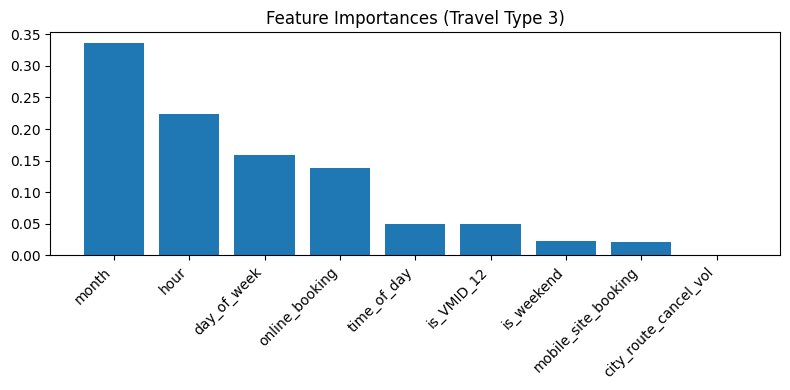

In [38]:
# --- Evaluation ---
    
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

results[ttype] = {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'cm': cm, 'model': clf, 'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred}

print(f"\n--- Travel Type {ttype} ---")
print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))

# Feature importance plot
if not X.empty:
       importances = clf.feature_importances_
       indices = np.argsort(importances)[::-1]
       plt.figure(figsize=(8,4))
       plt.title(f'Feature Importances (Travel Type {ttype})')
       plt.bar(range(X.shape[1]), importances[indices], align='center')
       plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha='right')
       plt.tight_layout()
       plt.show()
else:
        print(f"No features to plot for travel type {ttype}.")




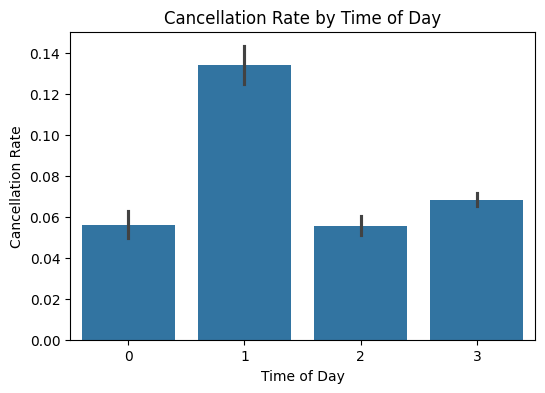

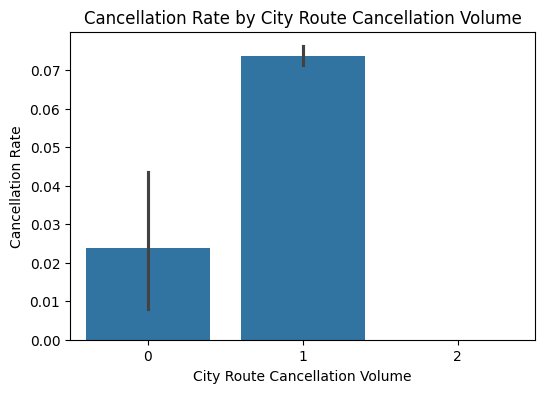

In [39]:
# --- ADDITIONAL VISUALIZATIONS (after feature engineering) ---
# Note: These visualizations are based on the final processed dataframe,
# which might have different columns than the original EDA section.

# Cancellation rate by booking_nature (if 'booking_nature' exists)
if 'booking_nature' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='booking_nature', y='Car_Cancellation', data=df)
    plt.title('Cancellation Rate by Booking Nature')
    plt.ylabel('Cancellation Rate')
    plt.xlabel('Booking Nature')
    plt.show()
else:
    print("Warning: 'booking_nature' column not found. Skipping cancellation rate by booking nature plot.")

# Cancellation rate by time_of_day (if 'time_of_day' exists)
if 'time_of_day' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='time_of_day', y='Car_Cancellation', data=df)
    plt.title('Cancellation Rate by Time of Day')
    plt.ylabel('Cancellation Rate')
    plt.xlabel('Time of Day')
    plt.show()
else:
    print("Warning: 'time_of_day' column not found. Skipping cancellation rate by time of day plot.")


# Cancellation rate by from_area_cancel_vol (if 'from_area_cancel_vol' exists)
if 'from_area_cancel_vol' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='from_area_cancel_vol', y='Car_Cancellation', data=df)
    plt.title('Cancellation Rate by Area Cancellation Volume')
    plt.ylabel('Cancellation Rate')
    plt.xlabel('Area Cancellation Volume')
    plt.show()
else:
    print("Warning: 'from_area_cancel_vol' column not found. Skipping cancellation rate by area cancellation volume plot.")


# Cancellation rate by city_route_cancel_vol (if 'city_route_cancel_vol' exists)
if 'city_route_cancel_vol' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='city_route_cancel_vol', y='Car_Cancellation', data=df)
    plt.title('Cancellation Rate by City Route Cancellation Volume')
    plt.ylabel('Cancellation Rate')
    plt.xlabel('City Route Cancellation Volume')
    plt.show()
else:
    print("Warning: 'city_route_cancel_vol' column not found. Skipping cancellation rate by city route cancellation volume plot.")